# Introduction to Scikit-Learn (sklearn)

This notebook demostrates some of the most useful function of the beautiful Scikit-Learn library.

What we are going to cover.
0. An end to end Scikit-Learn workflow.
1. Getting the data ready.
2. choose the right estimator/algorithm for our problems.
3. Fit the model/algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve a model.
6. Save and load a trained model.
7. Putting it all together!

# 0. End to end Scikit-Learn workflow

In [1]:
# 1. Get the data ready.
import pandas as pd

heart_disease = pd.read_csv("../Pandas/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# we will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train)  # Find the patterns in data (Model Training)

RandomForestClassifier()

In [6]:
# Make a prediction
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [7]:
y_test

263    0
275    0
208    0
262    0
234    0
      ..
290    0
31     1
280    0
167    0
197    0
Name: target, Length: 61, dtype: int64

In [8]:
# 4. Evaluate the model on trainig data and test data
clf.score(x_train, y_train)

1.0

In [9]:
clf.score(x_test, y_test)

0.7704918032786885

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [11]:
confusion_matrix(y_test, y_pred)

array([[21,  8],
       [ 6, 26]])

In [12]:
accuracy_score(y_test, y_pred)

0.7704918032786885

In [13]:
# 5. Improve a model
# Try different amount of n_estimators
import numpy as np

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train)
    print(clf.score(x_test, y_test))
    print("\n")

trying model with 10 estimators
0.7868852459016393


trying model with 20 estimators
0.7213114754098361


trying model with 30 estimators
0.7868852459016393


trying model with 40 estimators
0.8360655737704918


trying model with 50 estimators
0.8360655737704918


trying model with 60 estimators
0.8524590163934426


trying model with 70 estimators
0.8360655737704918


trying model with 80 estimators
0.8360655737704918


trying model with 90 estimators
0.8360655737704918




In [14]:
# Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
# Load our model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

loaded_model.score(x_test, y_test)

0.8360655737704918

# Getting our data ready to be used with Machine Learning

Three main things we have to do:
1. Split the data into features and labels (usually `x`, `y`).
2. Fiiling (also called imputing) or disregarding missing values.
3. Converting non-numerical values to numerical values (also called feature encoding)

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Make sure it's all numerical

In [21]:
car_sale = pd.read_csv("csv files/car-sales-extended.csv")
car_sale.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sale)

1000

In [23]:
# split into x/y
x = car_sale.drop("Price", axis=1)
y = car_sale["Price"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.head()

,Make,Colour,Odometer (KM),Doors
303,Toyota,White,134862,4
910,Nissan,White,40598,4
405,BMW,Blue,142189,3
432,Toyota,White,149989,4
43,Toyota,Blue,141617,4


In [24]:
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x) 


"""
First made list of columns for which we have to do transformation(1,0 conversion)
created object of OneHotEncoder class. (This class is used to convert data in 1,0 format or binary format)
created object of ColumnTransformer class while passed values as first parameter is list and second is remainder.
first parameter list contains 3 values as first is name of transformation, second is OneHotEncoder class object, 
third is list of columns on which we have to perform onehotencoding transfomration.

second parameter to ColumnTransformer class is remainder, which tells that other columns of dataframe which are not in list, will remain same, don't transform them.
"""

transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [25]:
# Fit the model (Model Training)

# split the transformed data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Fit the model (Training)
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
model.score(x_test, y_test)

0.2330485230539474

# 1.2 What if there were a missing values
1. Fill them with some values(also known as imoutation).
2. Remove the samples with missing data altogether.

In [27]:
# Import car sales missing data
car_sales_missing = pd.read_csv("csv files/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [28]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Create x and y
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing["Price"]

In [30]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


# Option 1: Fill missing data with pandas

In [31]:
# Fill the "Make" Column
car_sales_missing.fillna({"Make":"missing"}, inplace=True)

# Fill the "Colour" Column
car_sales_missing.fillna({"Colour": "missing"}, inplace=True)

# Fill the "Odometer (KM)" Column
car_sales_missing.fillna({"Odometer (KM)" : "missing"}, inplace=True)

# Fill the Doors Column
car_sales_missing.fillna({"Doors":4}, inplace=True)

In [32]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
# Remove rows with missing price value (Price is out target column that's  why remove rows.)
car_sales_missing.dropna(inplace=True)

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
# Create x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [37]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

# Option 2: Fill missing values with scikit learn

In [38]:
# Read data again as we already filled with pandas above

car_sale_missing = pd.read_csv("csv files/car-sales-extended-missing-data.csv")
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
# Drop the rows with no labels
car_sale_missing.dropna(subset=["Price"], inplace=True)
car_sale_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
# Split the data in x and y
from sklearn.model_selection import train_test_split
x = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

# Split the data in training and test set
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.head()

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0


In [42]:
x_train.isna().sum()

Make             35
Colour           38
Odometer (KM)    36
Doors            38
dtype: int64

In [43]:
# Fill the missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean.
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_feature)
])

transformed_x_train = imputer.fit_transform(x_train)
transformed_x_test = imputer.transform(x_test)
transformed_x_test

array([['Toyota', 'Blue', 4.0, 99761.0],
       ['Toyota', 'Black', 4.0, 17975.0],
       ['Honda', 'Blue', 4.0, 197664.0],
       ['Nissan', 'Green', 4.0, 235589.0],
       ['Honda', 'Black', 4.0, 231659.0],
       ['Toyota', 'Blue', 4.0, 247601.0],
       ['Toyota', 'Green', 4.0, 110078.0],
       ['missing', 'White', 4.0, 155383.0],
       ['Nissan', 'White', 4.0, 26634.0],
       ['Honda', 'White', 4.0, 130319.03314917127],
       ['Honda', 'Green', 4.0, 238825.0],
       ['Honda', 'Green', 4.0, 37606.0],
       ['Toyota', 'Blue', 4.0, 230908.0],
       ['Toyota', 'Red', 4.0, 159925.0],
       ['Toyota', 'Blue', 4.0, 181466.0],
       ['Toyota', 'Blue', 4.0, 140465.0],
       ['Toyota', 'White', 4.0, 146307.0],
       ['Toyota', 'Green', 4.0, 214179.0],
       ['Honda', 'White', 4.0, 184869.0],
       ['Toyota', 'Black', 4.0, 224986.0],
       ['Nissan', 'White', 3.0, 176135.0],
       ['Nissan', 'Red', 4.0, 130319.03314917127],
       ['Toyota', 'Blue', 4.0, 112223.0],
       ['BM

In [44]:
# Now convert our numpy.ndarrays into dataframe (transformed_x_train, transformed_x_test)
car_sale_filled_train = pd.DataFrame(transformed_x_train, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sale_filled_test = pd.DataFrame(transformed_x_test,
                                    columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [45]:
car_sale_filled_train.isna().sum(), car_sale_filled_test.isna().sum()

(Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [46]:
# Convert categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Colums have to do one hot encoding
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transform = ColumnTransformer([(
                                "one_hot",
                                one_hot,
                                categorical_features
                            )],
                             remainder="passthrough")

encoded_train_x = transform.fit_transform(car_sale_filled_train)
encoded_test_x = transform.fit_transform(car_sale_filled_test)

In [47]:
encoded_test_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 760 stored elements and shape (190, 15)>

In [48]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(encoded_train_x, y_train)
model.score(encoded_test_x, y_test)

0.21735623151692096

# Choosing the right estimator/algorithm for your problem
Some things to note:

1. sklearn refers to machine learning model, algorithms as estimators.
2. Classification problem - Predicting a category(heart disease or not)
       somethimes you will see `clf` (short for classifier) used as a classification estimator.
3. Regression problem - Predicting a number (selling price of a car).

If You are working with machine learning problem and looking to use sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/machine_learning_map.html

# 2.1 Picking a machine learning model for a regression problem
lets use a california dataset - https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

In [49]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
# Convert to DataFrame
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
# Just renaming "MedHouseVal" column
housing_df["target"] = housing_df["MedHouseVal"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
# Import algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data in training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.5758549611440126

# What if Ridge didn't work or score didn't fit our need?
Well we could always try a different model.

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)

sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [54]:
# Import the RandomForestRegressor model class from the ensemble module

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data in training as test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.8066196804802649

# Choosing an estimator for classification problem.
Let's go to the map: https://scikit-learn.org/stable/machine_learning_map.html

In [56]:
heart_disease = pd.read_csv("../Pandas/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [58]:
# Import the LinearSVC estimator class.
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Split the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# fit the model
clf = LinearSVC(max_iter=1000)
clf.fit(x_train, y_train)

# Evaluate the LinearSVC
clf.score(x_test, y_test)

0.8360655737704918

In [59]:
# Use RandomForestClassifier for same data

from sklearn.ensemble import RandomForestClassifier

# Split the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model (Training the machine learning model.)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Evaluate the model (Use the patterns the model has learned)
clf.score(x_test, y_test)

0.9016393442622951

Tidbit:
1. If you have structured data, use ensemble methods.
2. If you have unstructured data, use deep learning or transfer learning.

# 3 Fit the model/algorithm on our data and use it to make predictions.

3.1 Fitting the model to the data

Difference names for
* `x` : features, feature vriables, data
* `y` : labels, target, target variables

# 3.2 Make predictions usings machine learning model
* using predict()
* using preict_proba()

In [60]:
# Making predictions using predict() function.

y_preds = clf.predict(x_test)

# np.array(y_test)
np.mean(y_test == y_pred)

0.5081967213114754

In [61]:
clf.score(x_test, y_test)

0.9016393442622951

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5081967213114754

# making predictions using `predict_proba()`

In [63]:
# predict_proba() function returns probabilities of a classification

clf.predict_proba(x_test[:5])

array([[0.67, 0.33],
       [0.41, 0.59],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.91, 0.09]])

In [64]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 0])

In [65]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3


# `predict()` can also be used for regression models.

In [66]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model intance and fit the model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

In [68]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.3265721842781009

# 4. Evaluating Machine Learning Model
Three ways to evaluate the Scikit-Learn models/estimators:
1. Estimator's built-in `score()` method.
2. The `scoring` parameter.
3. Problem-Specific metric functions.

In [69]:
# 4.1 Evaluating model with the score() method.

from sklearn.ensemble import RandomForestClassifier

# Split the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model (Training the machine learning model.)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [70]:
clf.score(x_train, y_train)

1.0

In [71]:
clf.score(x_test, y_test)

0.7868852459016393

Let's use the `score()` on our regression problem.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create model intance and fit the model
model = RandomForestRegressor(n_estimators=200)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [73]:
# The default score() evaluation matric is r_squared for regression algorithms.
# Highest = 1.0 and Lowest = 0.0
model.score(x_train, y_train)

0.9741211191483218

In [74]:
model.score(x_test, y_test)

0.8066883505926075

In [75]:
# 4.2 Evaluating a model using the scoring parameter

from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Split the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit the model (Training the machine learning model.)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [76]:
clf.score(x_test, y_test)

0.8032786885245902

In [77]:
cross_val_score(clf, x, y)

array([0.80327869, 0.90163934, 0.81967213, 0.76666667, 0.78333333])

In [78]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(x_test, y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y))

clf_single_score, clf_cross_val_score

(0.8032786885245902, 0.8248087431693989)

# 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

# 1. Accuracy

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y, cv=5)

In [80]:
cross_val_score

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [81]:
np.mean(cross_val_score)

0.8018032786885245

In [82]:
print(f"Heart disease classifier cross validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier cross validated Accuracy: 80.18%


# 2. Area under reciever operating characteristics curve(ROC/AUC)

* Area under curve
* ROC curve
  
ROC curves are a comparison of model's true positive rate(tpr) versus a model's false positive rate (fpr). 
* True Positive = model predicts 1 when truth is 1. 
* False Positive = model predicts 1 when truth is 0.
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1.

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [84]:
from sklearn.metrics import roc_curve

# Fit the model
clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.11, 0.89],
       [0.53, 0.47],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.87, 0.13]])

In [85]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [86]:
# Calculate fpt, tpr, thresholds
fpr, tpr, hresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

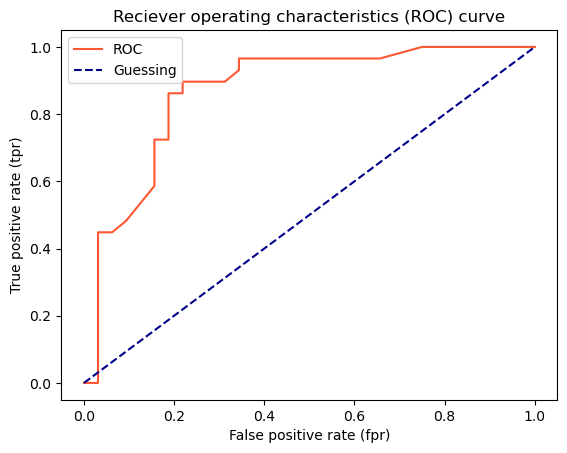

In [87]:
# Create a function for plotting ROC curve.
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="#FF5733", label="ROC")

    # Plot line with no predictive power (Baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customizing the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever operating characteristics (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8679956896551724

# Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels model was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html

In [89]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[24,  8],
       [ 3, 26]])

In [90]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_pred,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


In [91]:
24 + 8 + 3 + 26

61

In [92]:
len(y_test)

61

In [93]:
# Confusion matrix [0][0] gives count of predictions where actual value is 0 and model predicts 0.
# Confusion matrix [0][1] gives count of predictions where actual value is 0 and model predicts 1.
# Confusion matrix [1][0] gives count of predictions where actual value is 1 and model predicts 0.
# Confusion matrix [1][1] gives count of predcitions where actual value is 1 and model predicts 1.

<Axes: >

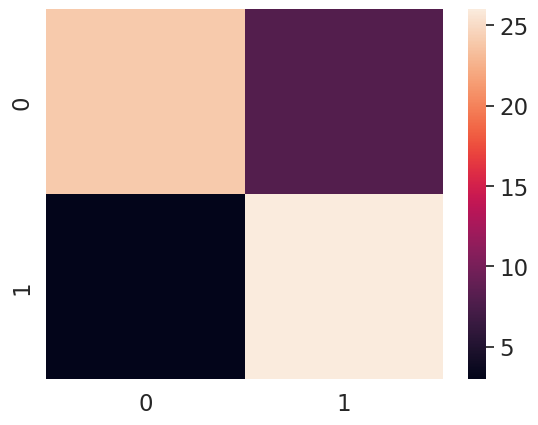

In [94]:
# Make our confusion maxtrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font style
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
sns.heatmap(conf_mat)

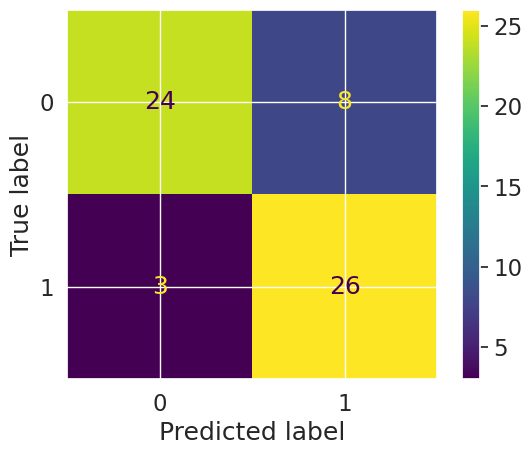

In [95]:
# Creating a Confusion matrix using Scikit-Learn

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

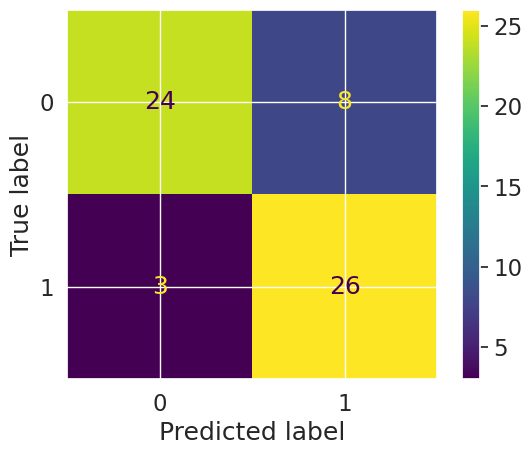

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Classification Report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [98]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_pred = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_pred,
                                  output_dict=True))

/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# 4.2.2 Regression Model Evaluation Matrics

The Ones we are going to cover are:
1. R^2 (r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [99]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [100]:
model.score(x_test, y_test)

0.8066196804802649

In [101]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [102]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

# 1. R^2 (r-squared) or coefficient of determination


In [103]:
r2_score(y_test, y_test_mean)

0.0

In [104]:
r2_score(y_test, y_test)

1.0

In [105]:
r2_score(y_test, y_pred)

0.8066196804802649

# 2. Mean Absolute Error (MAE)
MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are.


In [106]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.3265721842781009

In [107]:
df = pd.DataFrame(data={"Actual Values": y_test,
                       "Predicted Values": y_pred})

In [108]:
# MAE using formulas and differences
df["difference"] = df["Predicted Values"] - df["Actual Values"]
np.abs(df["difference"]).mean()

0.3265721842781009

# 3 Mean Squared Error (MSE)
MSE is the mean of the square of the errors between actual and predicted values.

In [109]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.2534073069137548

In [110]:
# Calculate MSE by formula
df["Squared difference"] = np.square(df["difference"])
df["Squared difference"].mean()

0.2534073069137548

# 4.2.3 Finally using the scoring parameter.

# Scoring parameter for classification

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [112]:
np.random.seed(42)

# cross validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring=None) # If scoring=None, estimators default scoring evaluation metrics is used.
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [113]:
# Cross validated accuracy
print(f"The cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is : 82.48%


In [114]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [115]:
# Cross validated accuracy
print(f"The cross validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is : 82.48%


In [116]:
np.random.seed(42)

cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [117]:
# Cross validated precision
print(f"The cross validated precision is : {np.mean(cv_precision)}")

The cross validated precision is : 0.8329547346025924


In [118]:
# Recall
np.random.seed(42)

cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [119]:
# Cross validated recall
print(f"The cross validated recall is : {np.mean(cv_recall)}")

The cross validated recall is : 0.8545454545454545


# Scoring parameter for regression 

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [121]:
np.random.seed(42)

cv_r2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [122]:
# Mean Squared Error

cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
cv_mse

array([-0.51821856, -0.3315067 , -0.53872975])

In [123]:
np.mean(cv_mse)

-0.46281833778669723

In [124]:
# Mean Absolute Error

cv_mae = cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae

array([-0.51737186, -0.4219676 , -0.50676033])

In [125]:
np.mean(cv_mae)

-0.4820332646560079

# 4.3 Using different evaluation metrics as Scikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module.

In [126]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a model
clf = RandomForestClassifier()

# Fit the model
clf.fit(x_train, y_train)

# Make Predictions
y_pred = clf.predict(x_test)

# Evaluate model using evaluation functions
print("Classifier matrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"f1: {f1_score(y_test, y_pred)*100:.2f}%")
print(f"recall: {recall_score(y_test, y_pred)*100:.2f}%")

Classifier matrics on the test set
Accuracy: 85.25%
Precision: 84.85%
f1: 86.15%
recall: 87.50%


In [127]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x and y
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a model
model = RandomForestRegressor()

# Fit the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate model using evaluation functions
print("Regression matrics on the test sets")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"mae: {mean_absolute_error(y_test, y_pred)}")
print(f"mse: {mean_squared_error(y_test, y_pred)}")

Regression matrics on the test sets
R2 score: 0.8066196804802649
mae: 0.3265721842781009
mse: 0.2534073069137548


# 5. Improving a Model

* First Predictions = baseline predictions. 
* First model = baseline model

From a data perspective:
* Could we collect more data? (Generally the more data, it's better.)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyper Parameters vs Parameters
* Parameters = Model finds these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability to find patterns.

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

# 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training, validation and test.

In [128]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust:
1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [129]:
def evaluate_preds(y_true, y_pred):
    """
    Perform evaluation comparison on y_true labels vs y_pred labels on classification.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    metric_dict = {"Accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}

    return metric_dict

In [130]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffle = heart_disease.sample(frac=1)

# Split into x and y
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split the data into training, validation and test sets.
train_split = round(0.7 * len(heart_disease_shuffle)) # 70% of Data
val_split = round(train_split + 0.15 * len(heart_disease_shuffle)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_val, y_val = x[train_split:val_split], y[train_split:val_split]
x_test, y_test = x[val_split:], y[val_split:]


clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make Baseline predictions
y_preds = clf.predict(x_val)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_val, y_preds)
baseline_metrics

{'Accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [131]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(x_train, y_train)

# Make Baseline predictions
y_preds = clf_2.predict(x_val)

# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_val, y_preds)
clf_2_metrics

{'Accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

# Hyperparameter tuning with RandomizedSearchCV

In [132]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
       "max_depth":[None, 5, 10, 20, 30],
       "max_features":["auto", "sqrt"],
       "min_samples_split":[2, 4, 6],
       "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                           param_distributions=grid,
                           n_iter=10,   # No of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/omkarjadhav/Machine Learning/Learning_Mater

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [133]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [134]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)  # This will use best parameter's combintion for prediction bydefault.

# Evaluate the predictions.
rs_metrics = evaluate_preds(y_test, rs_y_preds)

In [135]:
rs_metrics

{'Accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

# 5.3 Hyperparameter tuning with GridSearchCV

* GridSearchCv will go with all the posible combinations of hyperparameters.
* RandomizedSearchCV go with only n_inter values.

In [136]:
grid_2 = {"n_estimators":[100, 200, 500],
       "max_depth":[None],
       "max_features":["auto", "sqrt"],
       "min_samples_split":[6],
       "min_samples_leaf":[1, 2]}

In [137]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into x and y
x = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
gc_clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/omkarjadhav/Machine Learning/Learning_Material/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/omkarjadhav/Machine Learning/Learning_Mater

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [138]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [139]:
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predctions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

{'Accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

Let's compare our different models matrics

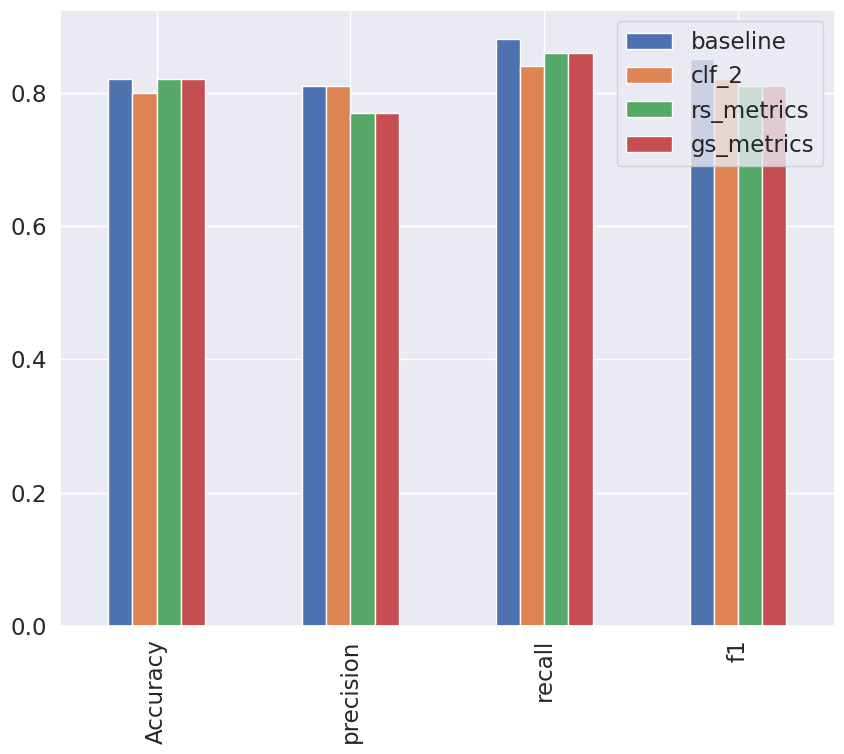

In [140]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "rs_metrics": rs_metrics,
                               "gs_metrics": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# For above 3 types of tuning hyperparameters we compare models which are trained on different splitted data. Which is not a good approach.
# So we are going to tune hyperparameters againg and train model on same split data by tuning parameters By Hand, RandomizedSearchCV, GridSearchCv.

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

heart_disease = pd.read_csv("../Pandas/heart-disease.csv")

# Split the data in x and y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# By Hand (Baseline model)

In [142]:
# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
baseline_metrics = evaluate_preds(y_test, y_pred)
baseline_metrics

{'Accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.84}

# RandomizedSearchCV

We are using `refit` parameter in RandomizedSearchCV() class to refit the model again on entire training data when RandomizedSearchCV found combination of best parameters.


In [143]:
# Setup the parameters grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # No. of Models to try
                            cv=5, 
                            verbose=2,
                            random_state=42,
                            refit=True)

# Setup RandomizedSearchCV
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [144]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [145]:
rs_y_pred = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test, rs_y_pred)
rs_metrics

{'Accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.84}

# GridSearchCV

In [146]:
# Setup grid-2 (refined version of grid)
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['log2', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2,
                     refit=True)

gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [147]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [148]:
gs_y_pred = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test, gs_y_pred)
gs_metrics

{'Accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.84}

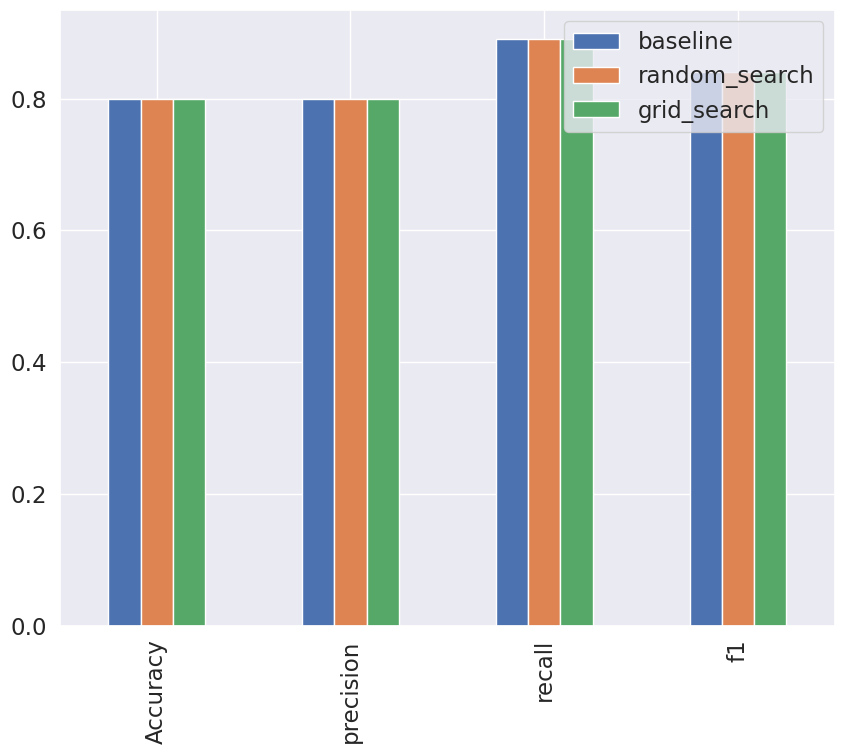

In [149]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "random_search": rs_metrics,
                               "grid_search":gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

# 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. with Python's `pickle` module.
2. with the `joblib` module

In [150]:
# By pickle

import pickle

# Save an existing model to file.
pickle.dump(gs_clf, open("gs_pickle_model.pkl", "wb"))

In [151]:
# Load a saved model
loaded_model = pickle.load(open("gs_pickle_model.pkl", "rb"))

In [152]:
# Make some predictions
pickle_y_preds = loaded_model.predict(x_test)

pickle_metrics = evaluate_preds(y_test, pickle_y_preds)
pickle_metrics

{'Accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.84}

In [153]:
# By Joblib

from joblib import load, dump

# Save model to file.
dump(gs_clf, filename="gs_pickle_model_1.joblib")

['gs_pickle_model_1.joblib']

In [154]:
# Import a saved joblib model

loaded_joblib_model = load(filename="gs_pickle_model_1.joblib")

In [155]:
# Make and Evaluate joblib model predictions
job_lib_y_pred = loaded_joblib_model.predict(x_test)
joblib_metrics = evaluate_preds(y_test, job_lib_y_pred)
joblib_metrics

{'Accuracy': 0.8, 'precision': 0.8, 'recall': 0.89, 'f1': 0.84}

# 7. Putting it all together

In [156]:
car_sale_data = pd.read_csv("csv files/car-sales-extended-missing-data.csv")
car_sale_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


Steps we want to do (all in one cell).
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [157]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("csv files/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformation pipeline

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

doors_features = ["Doors"]
doors_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_fatures = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("doors", doors_transformer, door_features),
    ("num", numeric_transformer, numeric_fatures)
])

# creating a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split the data
x = data.drop("Price", axis=1)
y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to use GridSearchCV and RandomizedSearchCV with our pipeline

# Use GridSearchCV with our regression Pipeline.
In pipeline when we use gridsearchcv we have to give path for the perticular operation on which we have to add hyperparameter.
In below dictionary we are using `preprocessor` object to go to `num` which is label for numeric columns on which we are doing column transformation.
From there we are going to pipeline for numeric columns for SimpleImputer by `imputer` label, then to `strategy`. That's how we can define key in GridSearchCV


In [158]:
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["log2"],
    "model__min_samples_leaf": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_leaf=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=log2, model__min_samples_le

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('doors',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['log2'],
                         'model__min_samples_leaf': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [159]:
gs_model.score(x_test, y_test)

0.28817204240175365